# Import libraries 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [2]:
movie = pd.read_csv("my_movies.csv")
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [3]:
df=pd.get_dummies(movie)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Apriori Algorithm 

In [18]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V3_Sixth Sense, Sixth Sense, V2_Patriot, Patr..."
77,0.4,"(V3_Sixth Sense, Sixth Sense, V1_Gladiator, V2..."
78,0.4,"(V3_Sixth Sense, Sixth Sense, V1_Gladiator, V2..."
79,0.4,"(V3_Sixth Sense, V1_Gladiator, V2_Patriot, Pat..."


In [19]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator, V2_Patriot, Patrio...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(V1_Gladiator),"(V3_Sixth Sense, Sixth Sense, V2_Patriot, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V2_Patriot),"(V3_Sixth Sense, Sixth Sense, V1_Gladiator, Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Patriot),"(V3_Sixth Sense, Sixth Sense, V1_Gladiator, V2...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [20]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V4_Green Mile),"(Sixth Sense, V1_Sixth Sense, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
320,"(V1_Sixth Sense, V4_Green Mile)","(Sixth Sense, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
319,"(V1_Sixth Sense, Green Mile)","(Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
318,"(Sixth Sense, V1_Sixth Sense)","(V4_Green Mile, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
32,(V1_Sixth Sense),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
33,(Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
34,(V4_Green Mile),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
35,(Green Mile),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
317,"(Sixth Sense, Green Mile, V4_Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [21]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator, V2_Patriot, Patrio...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(V1_Gladiator),"(V3_Sixth Sense, Sixth Sense, V2_Patriot, Patr...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V2_Patriot),"(V3_Sixth Sense, Sixth Sense, V1_Gladiator, Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Patriot),"(V3_Sixth Sense, Sixth Sense, V1_Gladiator, V2...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [22]:
support=rules.support
confidence=rules.confidence

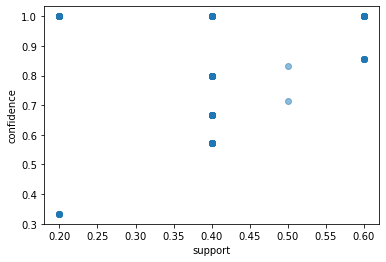

In [23]:
import random
import matplotlib.pyplot as plt

plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()